In [1]:
import sys, os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
ppath = '/stanley/WangLab/Connie/01.RIBOmap'

# Ribosome profiling

In [3]:
# import ribosome profiling data
riboprof_original = pd.read_excel(os.path.join(ppath, 'GSE63591_C-Y1-Ribosome_profiling.xlsx'), index_col=0, header=[0,1,2])
riboprof_original

rep1_siYTHDF1_1                                         \
rpkm        Ribosome-bound fragments                                          
Gene symbol           siControl-ribo siYTHDF1-ribo log2(siYTHDF1/siControl)   
A4GALT                      26.23290      17.14540                -0.613556   
AAAS                       160.79900     148.74900                -0.112378   
AACS                        43.30910      18.42950                -1.232653   
AADAT                        1.96698       3.56326                 0.857215   
AAED1                       57.07260      33.83190                -0.754414   
...                              ...           ...                      ...   
ZYG11A                       7.05715       7.44783                 0.077734   
ZYG11B                      21.66850       8.17198                -1.406842   
ZYX                        123.28600      39.57480                -1.639355   
ZZEF1                        7.35440       4.57795                -0.683906   
ZZZ3                        34.75790      12.71850                -1.450412   

                                                                       \
rpkm        Poly(A)+ mRNA input                                         
Gene symbol       siControl-RNA siYTHDF1-RNA log2(siYTHDF1/siControl)   
A4GALT                  3.59516      3.38900                -0.085196   
AAAS                   14.75670     12.13730                -0.281923   
AACS                    4.17775      3.87637                -0.108020   
AADAT                   2.99196      2.18340                -0.454514   
AAED1                  14.53190     17.41310                 0.260950   
...                         ...          ...                      ...   
ZYG11A                  7.17137      7.23465                 0.012674   
ZYG11B                 10.21150     13.76830                 0.431156   
ZYX                     5.29043      4.00597                -0.401233   
ZZEF1                   4.28824      5.18837                 0.274896   
ZZZ3                   24.61720     25.49520                 0.050559   

                                              rep2_siYTHDF1_8                \
rpkm          Translation Efficiency Ribosome-bound fragments                 
Gene symbol log2(siYTHDF1/siControl)           siControl-ribo siYTHDF1-ribo   
A4GALT                     -0.528359                 3.488310      0.872616   
AAAS                        0.169544                41.451800     27.444800   
AACS                       -1.124633                16.008100      8.047190   
AADAT                       1.311730                 4.479480      3.840400   
AAED1                      -1.015364                47.201700     28.772800   
...                              ...                      ...           ...   
ZYG11A                      0.065060                 0.476994      4.299420   
ZYG11B                     -1.837997                12.133800      3.397470   
ZYX                        -1.238122                12.753800     10.550000   
ZZEF1                      -0.958802                 1.440930      2.399060   
ZZZ3                       -1.500971                17.141800     19.124500   

                                                                       \
rpkm                                 Poly(A)+ mRNA input                
Gene symbol log2(siYTHDF1/siControl)       siControl-RNA siYTHDF1-RNA   
A4GALT                     -1.999110             8.36037     11.90540   
AAAS                       -0.594901            39.22110     31.38020   
AACS                       -0.992243             9.68128     13.93100   
AADAT                      -0.222075             2.87454      3.04338   
AAED1                      -0.714132            20.15800     22.76610   
...                              ...                 ...          ...   
ZYG11A                      3.172100             7.05888      7.57895   
ZYG11B                     -1.836490             7.641

In [6]:
adata = sc.read_h5ad(os.path.join(ppath, 'result/FUCCI data/adata', 'FUCCI_cc_02-22-22.h5ad'))
genes = adata.var.index
flt_genes = genes[adata.var['filter']]

In [17]:
riboprof = riboprof_original[np.isin(riboprof_original.index, genes)]
riboprof

rep1_siYTHDF1_1                                         \
rpkm        Ribosome-bound fragments                                          
Gene symbol           siControl-ribo siYTHDF1-ribo log2(siYTHDF1/siControl)   
A4GALT                      26.23290      17.14540                -0.613556   
AARS                       706.51000     315.18700                -1.164502   
ABCC1                       29.31730      32.11400                 0.131450   
ABL1                        19.75880      12.92500                -0.612331   
ABL2                        12.74180      13.29570                 0.061391   
...                              ...           ...                      ...   
ZSCAN12                      3.86852      10.11950                 1.387284   
ZSCAN29                      5.81199       4.65872                -0.319099   
ZXDB                        19.09330       9.09215                -1.070373   
ZXDC                        18.77420      19.15720                 0.029135   
ZYG11A                       7.05715       7.44783                 0.077734   

                                                                       \
rpkm        Poly(A)+ mRNA input                                         
Gene symbol       siControl-RNA siYTHDF1-RNA log2(siYTHDF1/siControl)   
A4GALT                  3.59516      3.38900                -0.085196   
AARS                  117.72500    128.06400                 0.121444   
ABCC1                   3.83924      3.88534                 0.017220   
ABL1                   17.43740     19.05950                 0.128325   
ABL2                    7.54194      7.80530                 0.049518   
...                         ...          ...                      ...   
ZSCAN12                 8.92485      9.09157                 0.026702   
ZSCAN29                 5.65653      6.61563                 0.225961   
ZXDB                    9.56158      7.73664                -0.305542   
ZXDC                    6.20212      6.75073                 0.122282   
ZYG11A                  7.17137      7.23465                 0.012674   

                                              rep2_siYTHDF1_8                \
rpkm          Translation Efficiency Ribosome-bound fragments                 
Gene symbol log2(siYTHDF1/siControl)           siControl-ribo siYTHDF1-ribo   
A4GALT                     -0.528359                 3.488310      0.872616   
AARS                       -1.285946               161.807000     88.488400   
ABCC1                       0.114230                14.864200     10.938500   
ABL1                       -0.740656                 7.006570      7.761490   
ABL2                        0.011872                16.320800     15.318000   
...                              ...                      ...           ...   
ZSCAN12                     1.360583                 5.052810      7.068070   
ZSCAN29                    -0.545060                 4.923860      2.531670   
ZXDB                       -0.764831                12.424100     10.826800   
ZXDC                       -0.093147                13.748000      3.853230   
ZYG11A                      0.065060                 0.476994      4.299420   

                                                                       \
rpkm                                 Poly(A)+ mRNA input                
Gene symbol log2(siYTHDF1/siControl)       siControl-RNA siYTHDF1-RNA   
A4GALT                     -1.999110             8.36037     11.90540   
AARS                       -0.870710           131.12600    131.65200   
ABCC1                      -0.442427             6.90438     10.29220   
ABL1                        0.147625            27.19780     27.61050   
ABL2                       -0.091487             6.58365      7.25373   
...                              ...                 ...          ...   
ZSCAN12                     0.484231             6.26366      5.73617   
ZSCAN29                    -0.959702             4.918

In [9]:
riboprof_flt = riboprof_original[np.isin(riboprof_original.index, flt_genes)]

In [22]:
# with pd.ExcelWriter(os.path.join(ppath, 'result', 'revision', 'ribosome profiling', 'ribosome_profiling_data.xlsx')) as writer:  
#     riboprof.to_excel(writer, sheet_name='overlap')
#     riboprof_flt.to_excel(writer, sheet_name='overlap+filter')

In [8]:
# mutual genes
mut_genes = genes[np.isin(genes, riboprof_original.index)]
mut_flt_genes = flt_genes[np.isin(flt_genes, riboprof_original.index)]

correlation between their two replicates

{'bodies': [<matplotlib.collections.PolyCollection at 0x2b8b822b7d60>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2b8b822b7be0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2b8b8229c7f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2b8b8229cbe0>}

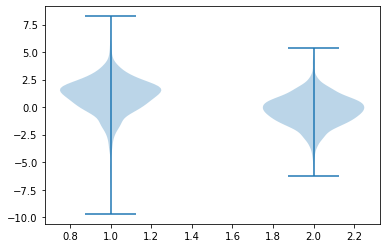

In [18]:
rep1 = np.log2(riboprof['rep1_siYTHDF1_1']['Ribosome-bound fragments']['siControl-ribo'] / 
                riboprof['rep1_siYTHDF1_1']['Poly(A)+ mRNA input']['siControl-RNA'])
rep2 = np.log2(riboprof['rep2_siYTHDF1_8']['Ribosome-bound fragments']['siControl-ribo'] / 
                riboprof['rep2_siYTHDF1_8']['Poly(A)+ mRNA input']['siControl-RNA'])
plt.violinplot([rep1, rep2])

Text(0.5, 1.0, 'pearsonR = 0.49009218674975447')

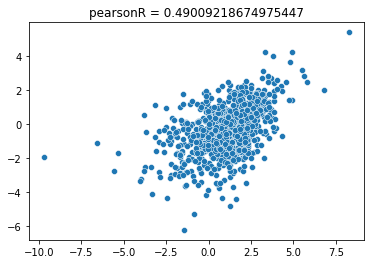

In [8]:
sns.scatterplot(x=rep1, y=rep2).set_title(f'pearsonR = {pearsonr(rep1, rep2)[0]}')

Text(0.5, 1.0, 'pearsonR = 0.5021011775065448')

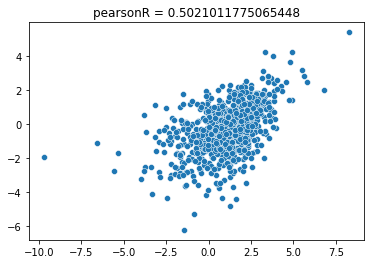

In [13]:
rep1_flt = np.log2(riboprof_flt['rep1_siYTHDF1_1']['Ribosome-bound fragments']['siControl-ribo'] / 
                riboprof_flt['rep1_siYTHDF1_1']['Poly(A)+ mRNA input']['siControl-RNA'])
rep2_flt = np.log2(riboprof_flt['rep2_siYTHDF1_8']['Ribosome-bound fragments']['siControl-ribo'] / 
                riboprof_flt['rep2_siYTHDF1_8']['Poly(A)+ mRNA input']['siControl-RNA'])
# plt.violinplot([rep1_flt, rep2_flt])
sns.scatterplot(x=rep1_flt, y=rep2_flt).set_title(f'pearsonR = {pearsonr(rep1_flt, rep2_flt)[0]}')

## Compare with our data

### unfiltered (933)

In [9]:
mut_adata = adata[:,mut_genes]
sc.pp.normalize_total(mut_adata)

/stanley/WangLab/envs/connie_TR/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
mut_adata_star = mut_adata.X[mut_adata.obs['sample']=='STARmap']
mut_adata_ribo = mut_adata.X[mut_adata.obs['sample']=='RIBOmap']

{'bodies': [<matplotlib.collections.PolyCollection at 0x2ae2ab01f580>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2ae2ab01f460>,
 'cmins': <matplotlib.collections.LineCollection at 0x2ae2ab01fbe0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2ae2ab01ffa0>}

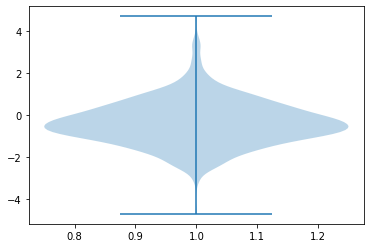

In [11]:
mean_star = np.mean(mut_adata_star, axis=0)
mean_ribo = np.mean(mut_adata_ribo, axis=0)
rte = np.log2(mean_ribo / mean_star)
plt.violinplot(rte)

Text(0.5, 1.0, 'pearsonR = 0.02')

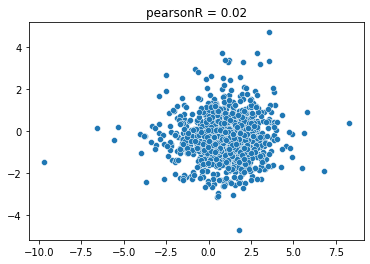

In [23]:
# with rep1
sns.scatterplot(x=rep1, y=rte).set_title(f'pearsonR = {pearsonr(rep1, rte)[0]:.2f}')

Text(0.5, 1.0, 'pearsonR = 0.02')

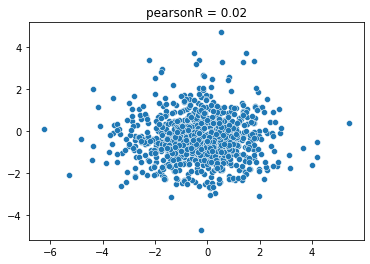

In [24]:
# with rep2
sns.scatterplot(x=rep2, y=rte).set_title(f'pearsonR = {pearsonr(rep2, rte)[0]:.2f}')

Text(0.5, 1.0, 'pearsonR = 0.02')

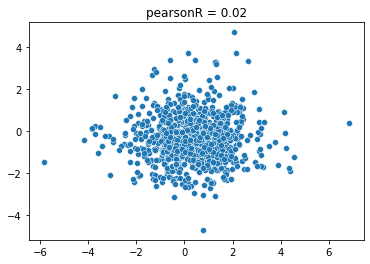

In [25]:
# with average
sns.scatterplot(x=(rep1+rep2)/2, y=rte).set_title(f'pearsonR = {pearsonr((rep1+rep2)/2, rte)[0]:.2f}')

### filtered (897)

/stanley/WangLab/envs/connie_TR/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


{'bodies': [<matplotlib.collections.PolyCollection at 0x2b8b820f1a90>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2b8b820f1970>,
 'cmins': <matplotlib.collections.LineCollection at 0x2b8b820e8820>,
 'cbars': <matplotlib.collections.LineCollection at 0x2b8b820f93d0>}

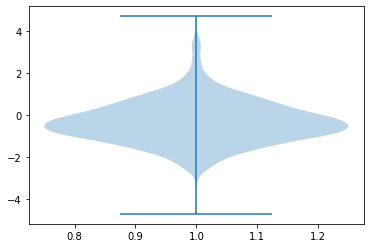

In [14]:
mut_flt_adata = adata[:,mut_flt_genes]
sc.pp.normalize_total(mut_flt_adata)
mut_flt_adata_star = mut_flt_adata.X[mut_flt_adata.obs['sample']=='STARmap']
mut_flt_adata_ribo = mut_flt_adata.X[mut_flt_adata.obs['sample']=='RIBOmap']
mean_star_flt = np.mean(mut_flt_adata_star, axis=0)
mean_ribo_flt = np.mean(mut_flt_adata_ribo, axis=0)
rte_flt = np.log2(mean_ribo_flt / mean_star_flt)
plt.violinplot(rte_flt)

Text(0.5, 1.0, 'pearsonR = -0.01')

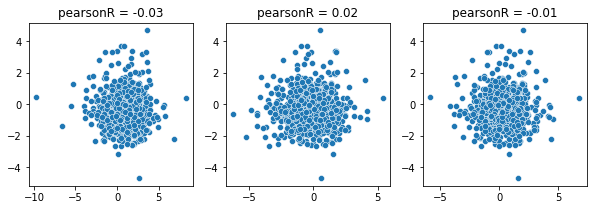

In [21]:
fig, ax = plt.subplots(1,3, figsize=(10,3))
sns.scatterplot(x=rep1_flt, y=rte_flt, ax=ax[0]).set_title(f'pearsonR = {pearsonr(rep1_flt, rte_flt)[0]:.2f}')
sns.scatterplot(x=rep2_flt, y=rte_flt, ax=ax[1]).set_title(f'pearsonR = {pearsonr(rep2_flt, rte_flt)[0]:.2f}')
sns.scatterplot(x=(rep1_flt+rep2_flt)/2, y=rte_flt, ax=ax[2]).set_title(f'pearsonR = {pearsonr((rep1_flt+rep2_flt)/2, rte_flt)[0]:.2f}')